### File to train a model on data of yoga poses
#### Data has been sourced from https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset
#### Author: Shlok Arjun Marathe
#### Date: 6th December 2024

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Define the hyperparameters for the model and data directories
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_dir = './DATASET/TRAIN'
test_dir = './DATASET/TEST'

In [ ]:
# Function to plot images from the dataset
def plot_yoga_images(train_dir):
    plt.figure(figsize = (15,15))
    for i, col in enumerate(os.listdir(train_dir)):
        image = random.choice(os.listdir(train_dir + '/' + col))
        image_path = train_dir + '/' + col + '/' + image
        img = mpimg.imread(image_path)/255

        plt.subplot(3,3,i+1)
        plt.title(col)
        plt.imshow(img)
        plt.axis(False)
        i = i + 1

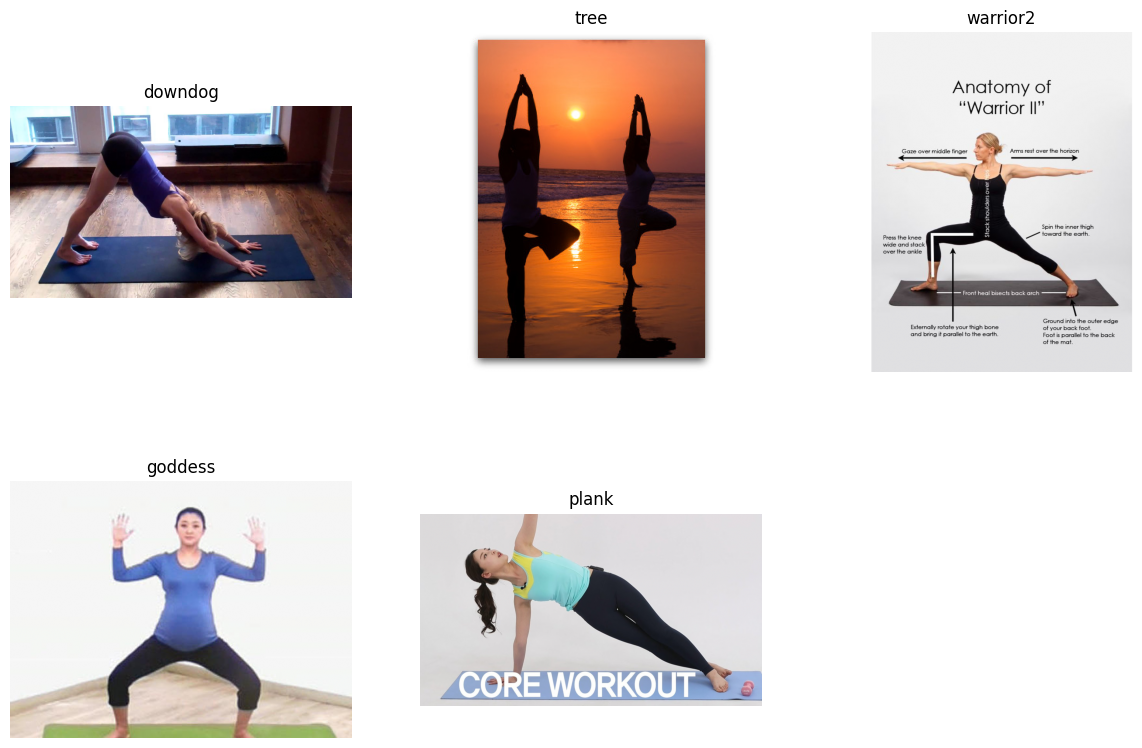

In [22]:
plot_yoga_images(train_dir)

In [ ]:
# Define the data transforms for the training and testing datasets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# Load the datasets and create the dataloaders
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test']),
}
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=BATCH_SIZE, shuffle=True),
    'test': DataLoader(image_datasets['test'], batch_size=BATCH_SIZE, shuffle=False),
}

In [ ]:
# Define the function to train the model
def train_model(model, dataloaders, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 10)

        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print(f"{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    return model

In [ ]:
# Initialize the model, loss function, and optimizer
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 5)
model = model.to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [20]:
# Train the model and save the trained model
trained_model = train_model(model, dataloaders, criterion, optimizer, EPOCHS)
torch.save(trained_model.state_dict(), "yoga_pose_model.pth")

Epoch 1/10
----------


/Users/shlok/Coding/RevoltronX/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.5764 Acc: 0.8094
Test Loss: 0.4908 Acc: 0.8191
Epoch 2/10
----------
Train Loss: 0.2912 Acc: 0.9056
Test Loss: 0.2185 Acc: 0.9234
Epoch 3/10
----------
Train Loss: 0.2029 Acc: 0.9362
Test Loss: 0.1271 Acc: 0.9574
Epoch 4/10
----------
Train Loss: 0.1396 Acc: 0.9593
Test Loss: 0.2666 Acc: 0.9255
Epoch 5/10
----------
Train Loss: 0.1401 Acc: 0.9537
Test Loss: 0.1083 Acc: 0.9745
Epoch 6/10
----------
Train Loss: 0.1173 Acc: 0.9621
Test Loss: 0.1952 Acc: 0.9404
Epoch 7/10
----------
Train Loss: 0.1192 Acc: 0.9574
Test Loss: 0.1198 Acc: 0.9574
Epoch 8/10
----------
Train Loss: 0.0880 Acc: 0.9676
Test Loss: 0.2120 Acc: 0.9532
Epoch 9/10
----------
Train Loss: 0.1061 Acc: 0.9639
Test Loss: 0.1472 Acc: 0.9489
Epoch 10/10
----------
Train Loss: 0.1068 Acc: 0.9648
Test Loss: 0.1242 Acc: 0.9596
